## My codes for 100 knocks for image processing (Question 1 through 10)

[https://github.com/yoyoyo-yo/Gasyori100knock](https://github.com/yoyoyo-yo/Gasyori100knock)

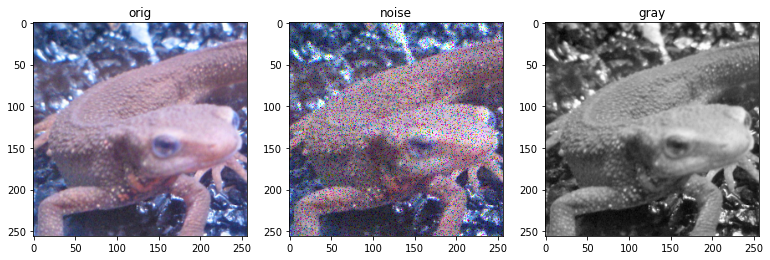

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

# img_orig = io.imread('https://github.com/yoyoyo-yo/Gasyori100knock/blob/master/dataset/images/imori_256x256.png')
img_orig = io.imread('./dataset/images/imori_256x256.png')
img_noise = io.imread('./dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(13, 4))
plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

### Question No. 11 平滑化フィルタ, Smoothing filter
ノイズ画像に対して、平滑化フィルタ(5x5)をかけよ。

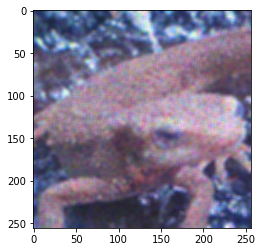

In [11]:
img_smoth = cv2.blur(img_noise, (5, 5)) 
plt.imshow(img_smoth)
# img_smoth

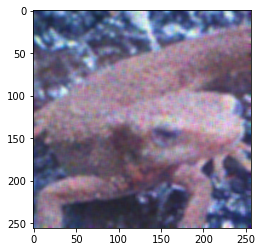

In [12]:
def filter_smooth(img, ksize=(3, 3)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(new_h - ksize_h + 1):
        for ix in range(new_w - ksize_w + 1):
            for ic in range(c):
                out[iy, ix, ic] = np.mean(_img[iy : iy + ksize_h, ix : ix + ksize_w, ic])

    # from math import ceil, floor
    # start_h = floor(ksize_h / 2)
    # start_w = floor(ksize_w / 2)
    # print(start_h, start_w)
    # out = out[start_h : start_h + h, start_w : start_w + w]
    
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_smoth2 = filter_smooth(img_noise, (5, 5))
plt.imshow(img_smoth2)
# img_smoth2

In [13]:
# img_smoth - img_smoth2

### Question No. 12 モーションフィルタ, Motion filter
モーションフィルタ(5x5)を実装せよ。

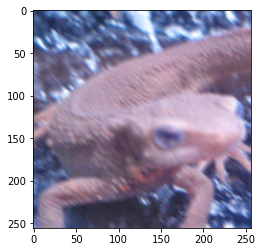

In [15]:
def motion_filter(img, ksize):
    filter = np.identity(ksize)
    filter /= ksize

    return cv2.filter2D(img, -1, filter)

img_mtn = motion_filter(img_orig, 5)
plt.imshow(img_mtn)

### Question No. 13 Max-Minフィルタ, Max-Min filter
グレースケールに対してMAX-MINフィルタ(3x3)を実装せよ。
MAX-MINフィルタとはフィルタ内の画素の最大値と最小値の差を出力するフィルタであり、エッジ検出のフィルタの一つである。

エッジ検出とは画像内の線を検出るすることであり、このような画像内の情報を抜き出す操作を特徴抽出と呼ぶ。

エッジ検出では多くの場合、グレースケール画像に対してフィルタリングを行う。

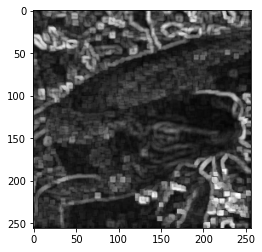

In [20]:
def filter_max_min(img, ksize=(5, 5)):
    _img = img.copy().astype(np.float32)
    ksize_h, ksize_w = ksize
    
    # padding
    h, w = img.shape[:2]
    pad_top, pad_bottom = ksize_h, ksize_h
    pad_left, pad_right = ksize_w, ksize_w
    
    if len(_img.shape) == 2:
        _img = np.expand_dims(_img, axis=-1)

    _img = np.pad(_img, [(pad_top, pad_bottom), (pad_left, pad_right), (0, 0)], 'edge')
    out = np.zeros_like(_img)
    
    new_h, new_w = out.shape[:2]
    c = 1 if len(out.shape) == 2 else out.shape[2]

    # filtering
    for iy in range(new_h - ksize_h):
        for ix in range(new_w - ksize_w):
            for ic in range(c):
                out[iy, ix, ic] = _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].max() - _img[iy : iy + ksize_h, ix : ix + ksize_w, ic].min()
            
    out = out[pad_top : pad_top + h, pad_left : pad_left + w]
    return np.clip(out, 0, 255).astype(np.uint8)

img_mm = filter_max_min(img_gray, (5, 5))
plt.imshow(img_mm, cmap="gray")
# img_mm

### Question No. 14 微分フィルタ, Differential filter
グレースケールに対して、微分フィルタ(3x3)を実装せよ。

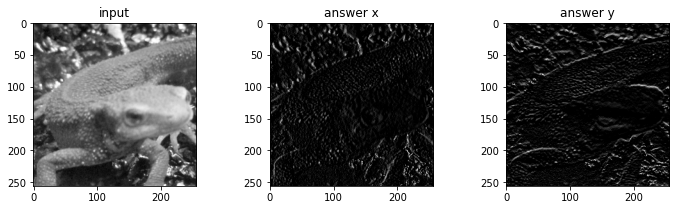

In [40]:
def filter_diff(img, mode='y'):
    if mode == 'x':
        kernel = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]])
    elif mode == 'y':
        kernel = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]])
    else:
        print("select 'x' or 'y' as 'mode'")
        return
    return cv2.filter2D(img, -1, kernel) 
  
img_diff_x = filter_diff(img_gray, mode='x')
img_diff_y = filter_diff(img_gray, mode='y')

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
# to show color difference clearly, I added times 4 term ("* 4" as below)
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_diff_x * 4, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_diff_y * 4, cmap='gray')
plt.show()


### Question No. 15 プリューウィットフィルタ, Prewitt filter
グレースケールに対して、Prewittフィルタ(5x5)を実装せよ。

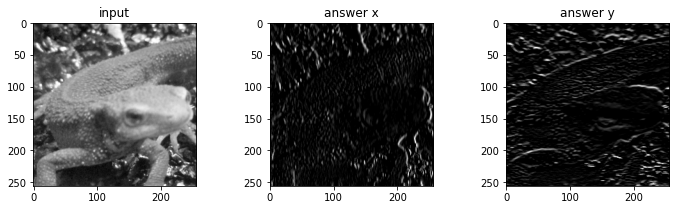

In [39]:
def filter_prewitt(img, ksize, mode):
    kernel = np.zeros(ksize)
    if mode == 'x':
        kernel[:, 0] = 1
        kernel[:, 1] = -1
    elif mode == 'y':
        kernel[0, :] = -1
        kernel[1, :] = 1
    else:
        print("select 'x' or 'y' as 'mode'")
        return
    return cv2.filter2D(img, -1, kernel) 

img_prewitt_x = filter_prewitt(img_gray, ksize=(5, 5), mode='x')
img_prewitt_y = filter_prewitt(img_gray, ksize=(5, 5), mode='y')
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_prewitt_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_prewitt_y, cmap='gray')
plt.show()

### Question No. 16 ソーベルフィルタ, Sobel filter
グレースケール に対して、Sobelフィルタ(3x3)を実装せよ。

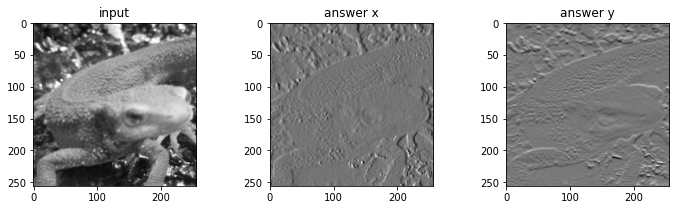

In [38]:
img_sobel_x = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
# img_sobel_x -= img_sobel_x.min()  # normalize > [0, 1]
# img_sobel_x /= img_sobel_x.max()
img_sobel_y = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)
# img_sobel_y -= img_sobel_y.min()  # normalize > [0, 1]
# img_sobel_y /= img_sobel_y.max()

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(img_sobel_x, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(img_sobel_y, cmap='gray')
plt.show()

### Question No. 17 ラプラシアンフィルタ, Laplacian filter
グレースケールに対して、Laplacianフィルタを実装せよ。

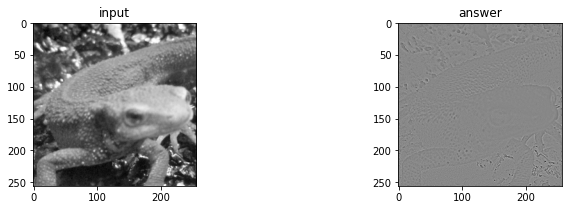

In [47]:
img_lapl = cv2.Laplacian(img_gray, cv2.CV_32F)
plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_lapl, cmap='gray')
plt.show()

### Question No. 18 エンボスフィルタ, Emboss filter
グレースケールに対して、Embossフィルタを実装せよ。

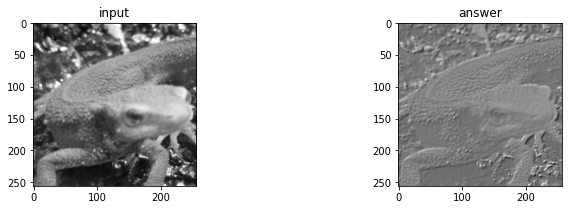

In [48]:
def filter_emboss(img):
    k = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min() # normalize > [0, 1]
    out /= out.max() 
    return out

img_emboss = filter_emboss(img_gray)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_gray, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_emboss, cmap='gray')
plt.show()


### Question No. 19 LoGフィルタ, LoG filter
LoGフィルタ(sigma=3、カーネルサイズ=5)を実装し、imori_noise_256x256.pngのエッジを検出せよ。

LoGフィルタとはLaplacian of Gaussianであり、ガウシアンフィルタで画像を平滑化した後にラプラシアンフィルタで輪郭を取り出すフィルタである。

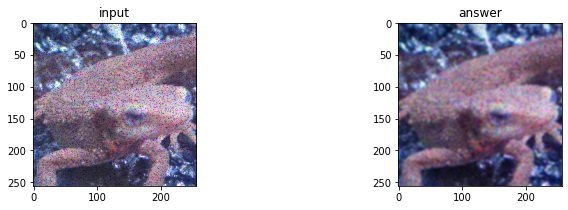

In [54]:
# answer
def filter_LoG(img, k_size=(3, 3), sigma=1.2):
    # kernel
    k = np.zeros(k_size, dtype=np.float32)
    pad_x = k_size[0] // 2
    pad_y = k_size[1] // 2
    for x in range(-pad_y, -pad_y + k_size[1]):
        for y in range(-pad_x, -pad_x + k_size[0]):
            k[y + pad_y, x + pad_y] = (x ** 2 + y ** 2 - 2 * (sigma ** 2)) * np.exp( - (x ** 2 + y ** 2) / (2 * (sigma ** 2)))
    k /= (2 * np.pi * (sigma ** 6))
    k /= k.sum()
 
    out = cv2.filter2D(img.astype(np.float32), -1, k)
    out -= out.min() # normalize > [0, 1]
    out /= out.max() 
    return out

img_log = filter_LoG(img_noise, k_size=(5, 5), sigma=3)

plt.figure(figsize=(12, 3))
plt.subplot(1, 2, 1); plt.title('input'); plt.imshow(img_noise, cmap='gray')
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_log, cmap='gray')
plt.show()


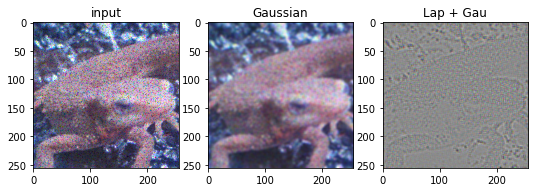

In [53]:
img_gau = cv2.GaussianBlur(img_noise, (5, 5), 3)
img_lapl = cv2.Laplacian(img_gau.astype(np.float32), cv2.CV_32F)
img_lapl -= img_lapl.min()  # normalize > [0, 1]
img_lapl /= img_lapl.max()

plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1); plt.imshow(img_noise); plt.title('input')
plt.subplot(1, 4, 2); plt.imshow(img_gau); plt.title('Gaussian')
plt.subplot(1, 4, 3); plt.imshow(img_lapl); plt.title('Lap + Gau')
plt.show()

### Question No. 20 ヒストグラム表示
matplotlibを用いてimori_256x256_dark.pngのヒストグラムを表示せよ。

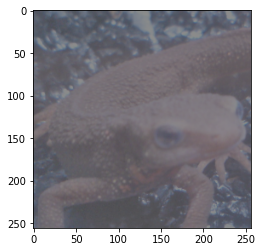

In [49]:
img_dark = io.imread('./dataset/images/imori_256x256_dark.png')
plt.imshow(img_dark)
plt.show()

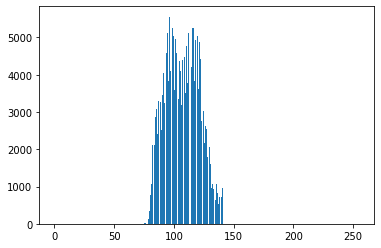

In [50]:
plt.hist(img_dark.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.show()